In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\my pythonfiles\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_encode
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


Data preprocessing

In [12]:
state_e=LabelEncoder()
df['state_encode']=state_e.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_encode
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [13]:
X=df[['R&D Spend','Administration','Marketing Spend','state_encode']]
Y=df[['Profit']]

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
profit_model=LinearRegression()
profit_model.fit(X_train,Y_train)

LinearRegression()

In [18]:
rd=float(input("Enter the gross domestic spending on research and development:  "))
admn=float(input("Enter your administrative expenses: "))
exp=float(input("Enter your  organization's total expenditure: "))
st=input("Enter your state name: ")

Enter the gross domestic spending on research and development:   34365689
Enter your administrative expenses:  3445668
Enter your  organization's total expenditure:  1234677
Enter your state name:  New York


In [19]:
state_enc=state_e.transform([st])[0]
print(state_enc)

2


In [21]:
result=profit_model.predict([[rd,admn,exp,state_enc]]) 
print(result)

[[27481604.71519688]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
model_predictions=profit_model.predict(X_test)

In [23]:
len(Y_test)

10

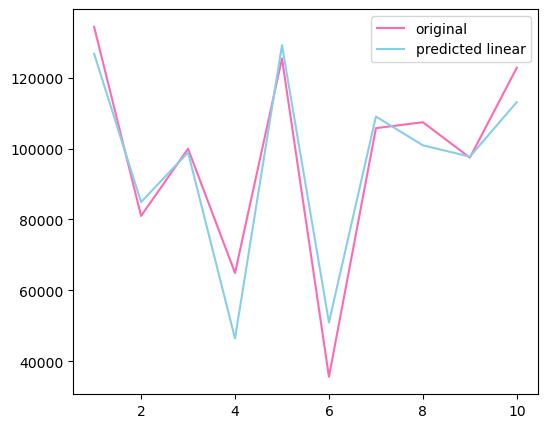

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(np.arange(1,11),Y_test,label="original",color='Hotpink')
plt.plot(np.arange(1,11),model_predictions,label="predicted linear",color='Skyblue')
plt.legend()
plt.show()

In [26]:
r2score=r2_score(Y_test,model_predictions)
print(r2score)
if(r2score>0.5):
    print("Model is good fit")
else:
    print("Model is not good fit")

0.9000614254946402
Model is good fit


In [28]:
mse=mean_squared_error(Y_test,model_predictions)
print(mse)

80929465.49097784


In [29]:
mae=mean_absolute_error(Y_test,model_predictions)
print(mae)

6979.17574672139
